<a href="https://colab.research.google.com/github/Sahel-Eskandar/Project-Notebooks/blob/main/4_Visualization_with_Seaborn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Exploratory Data Analysis and Visualization with Seaborn

In this notebook, I performed an EDA on the 'Students Performance in Exams' dataset. I visualized the data using the Seaborn library. Descriptions of the Seaborn graphics are located under the headings. My comments on the graphics and results are below the code snippet.

Content:
1. Exploratory Data Analysis - Explanation
1. Seaborn - Explanation
1. [Importing the Necessary Libraries](#0)
1. [Read Datas & Explanation of Features & Information About Datasets](#1)
   * [Variable Description](#2)
   * [Univariate Variable Analysis](#3)
     * [Categorical Variables](#4)
     * [Numerical Variables](#5)
1. [Basic Data Analysis](#6)
   * [gender](#7)
   * [race/ethnicity](#8)
   * [parental level of education](#9)
   * [lunch](#10)
   * [test preparation score](#11)
1. [Anomaly Detection](#12)
1. [Visualization](#13)
   * [Pie Plot](#14)
   * [Violin Plot](#15)
   * [Boxen Plot](#16)
   * [Swarm Plot](#17)
   * [Bar Plot](#18)
   * [Joint Plot](#19)
   * [Heatmap](#20)
   * [Pair Plot](#21)
   * [Box Plot](#22)
   * [Scatter Plot](#23)
     * [Scatter Plot with Marginal Ticks](#24)
     * [Scatter Plot with Multiple Semantics](#25)
   * [Stacked Histogram](#26)
   * [Ridge Plot](#27)
1. [Conclusion](#28)


## Exploratory Data Analysis

In statistics, exploratory data analysis is an approach to analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task. Exploratory data analysis was promoted by John Tukey to encourage statisticians to explore the data, and possibly formulate hypotheses that could lead to new data collection and experiments. EDA is different from initial data analysis (IDA), which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed. EDA encompasses IDA.

Source: https://en.wikipedia.org/wiki/Exploratory_data_analysis

## Seaborn

Seaborn is a statistical Python data visualization library based on the Matplotlib library. Seaborn offers users a high-level interface to make statistical visualizations.

* A dataset-based API presented to examine the relationships between multiple variables in detail

* Support for observing categorical variables and performing statistical operations on them

* Supports multi-plot grids that enable to create complex visualizations

* Univariate and bivariate visualizations for comparison between subsets

* Wide color scale that makes visualization more understandable

* Tools that adapt and visualize linear regression models for various types of independent and dependent variables

* Functions that visualize matrices of data and use clustering algorithms to discover the structure in that matrix.

* A function for displaying statistical time series data and uncertainties around the forecast with flexible prediction

* High-level abstractions for structuring charts that allow you to easily create complex visualizations

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/students-performance-in-exams/StudentsPerformance.csv


<a id = "0"></a><br>
# Importing the Necessary Libraries

In [ ]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
%matplotlib inline
import warnings
warnings.filterwarnings('ignore') 

<a id = "1"></a><br>
# Read Datas & Explanation of Features & Information About Datasets

In [ ]:
dataset = pd.read_csv('/kaggle/input/students-performance-in-exams/StudentsPerformance.csv', encoding="windows-1252")
dataset.sample(10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
217,female,group C,high school,free/reduced,none,34,42,39
720,female,group C,some college,free/reduced,none,62,72,70
125,female,group B,high school,standard,none,87,95,86
120,female,group C,bachelor's degree,standard,completed,79,92,89
829,male,group B,some high school,standard,none,68,54,53
754,male,group C,associate's degree,free/reduced,none,58,55,53
914,female,group B,associate's degree,free/reduced,none,46,61,55
588,female,group C,some college,standard,none,54,64,65
874,female,group C,bachelor's degree,free/reduced,none,43,62,61
261,male,group C,some college,standard,completed,79,79,78


<a id = "2"></a><br>
## Variable Description

* gender 
* race/ethnicity 
* parental level of education 
* lunch
* test preparation score 
* math score 
* reading score 
* writing score 

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


We have no NaN variable. So we do not have to handle missing values.

<a id = "3"></a><br>
## Univariate Variable Analysis

*** Categorical Variables:** 'gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course'

*** Numerical Variables:** 'math score', 'reading score', 'writing score'.

<a id = "4"></a><br>
### Categorical Variables

In [ ]:
def bar_plot(variable):
    """
        input: variable ex: "Sex"
        output: bar plot & value count
    """
    # get feature
    var = dataset[variable]
    # count number of categorical variable(value/sample)
    varValue = var.value_counts()
    
    # visualize
    plt.figure(figsize = (9,3))
    plt.bar(varValue.index, varValue)
    plt.xticks(varValue.index, varValue.index.values)
    plt.ylabel("Frequency")
    plt.title(variable)
    plt.show()
    print("{}:\n{}".format(variable,varValue))

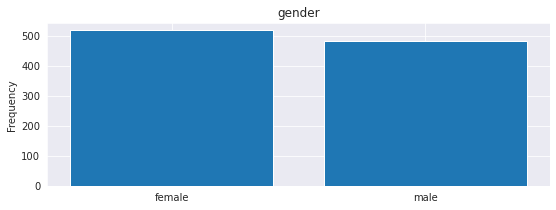

gender:
female    518
male      482
Name: gender, dtype: int64


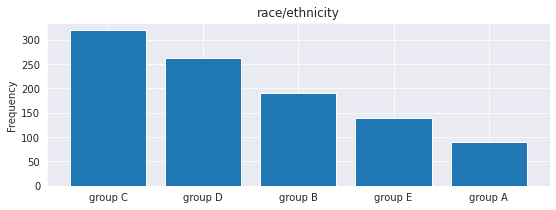

race/ethnicity:
group C    319
group D    262
group B    190
group E    140
group A     89
Name: race/ethnicity, dtype: int64


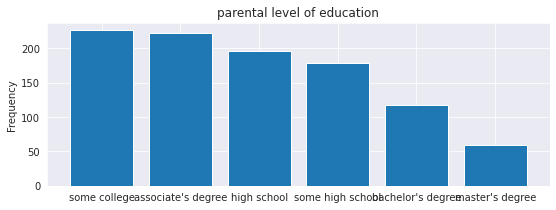

parental level of education:
some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64


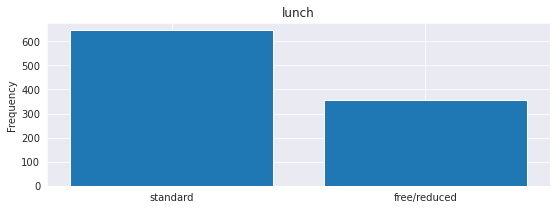

lunch:
standard        645
free/reduced    355
Name: lunch, dtype: int64


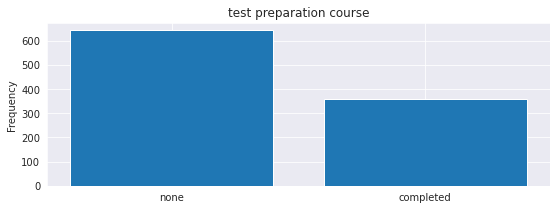

test preparation course:
none         642
completed    358
Name: test preparation course, dtype: int64


In [ ]:
sns.set_style('darkgrid')
categorical_variables = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
for c in categorical_variables:
    bar_plot(c)

### Outlines

* Female: 518, Male: 482; Gender distribution can be said to be balanced.
* We see that Ethnicity is not balanced. 'group C' predominates.
* We see that the education level of the parents is not evenly distributed. We see that the parents with a Master's degree are in the minority, and the ones with Some College are in the majority.
* In the 'lunch' feature, it can be said that the 'standard' doubles the other.
* We see that 642 students did not take test preparation courses, 358 of them did.

<a id = "5"></a><br>
### Numerical Variables

In [ ]:
def plot_hist(variable):
    plt.figure(figsize = (9,3))
    plt.hist(dataset[variable], bins = 50)
    plt.xlabel(variable)
    plt.ylabel("Frequency")
    plt.title("{} distribution with hist".format(variable))
    plt.show()

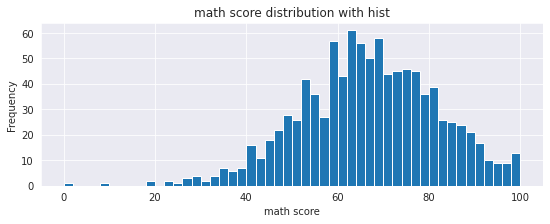

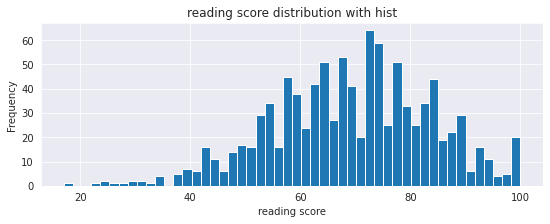

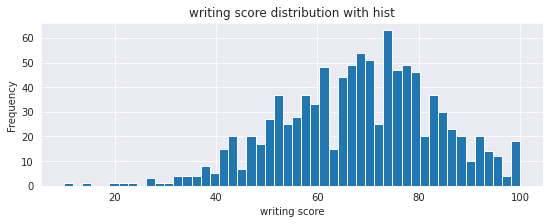

In [ ]:
numerical_variables = ['math score', 'reading score', 'writing score']
for n in numerical_variables:
    plot_hist(n)

### Outlines

* In the 'math score', there is an accumulation in the range of 60-80.
* There is no congestion in reading score like math. It can be said that the grade of the majority varies between 75-80.
* The distribution in the 'writing score' feature is like in reading score.

<a id = "6"></a><br>
# Basic Data Analysis

## gender X
* math score
* reading score
* writing score

## race/ethnicity X
* math score
* reading score
* writing score

## parental level of education
* math score
* reading score
* writing score

## lunch X
* math score
* reading score
* writing score

## test preparation course X
* math score
* reading score
* writing score

<a id = "7"></a><br>
## gender

In [ ]:
dataset[["gender","math score"]].groupby(["gender"], as_index = False).mean().sort_values(by="math score",ascending = False)

,gender,math score
1,male,68.728216
0,female,63.633205


In [ ]:
dataset[["gender","reading score"]].groupby(["gender"], as_index = False).mean().sort_values(by="reading score",ascending = False)

,gender,reading score
0,female,72.608108
1,male,65.473029


In [ ]:
dataset[["gender","writing score"]].groupby(["gender"], as_index = False).mean().sort_values(by="writing score",ascending = False)

,gender,writing score
0,female,72.467181
1,male,63.311203


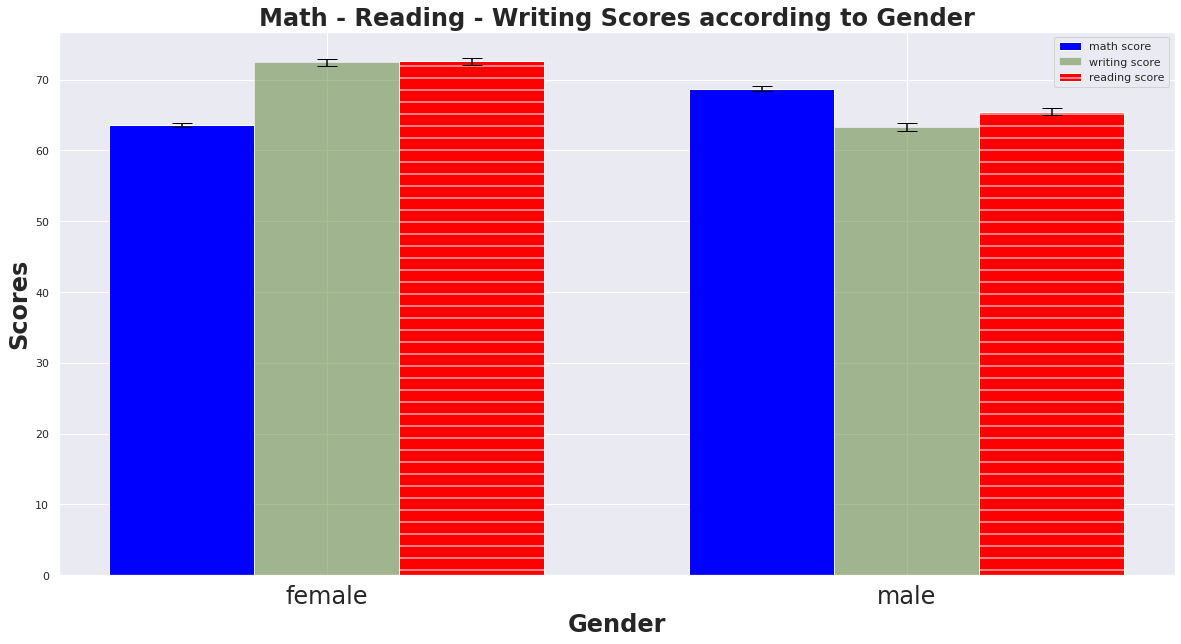

In [ ]:
race_math = dataset[["gender","math score"]].groupby(["gender"], as_index = False).mean()
race_writing = dataset[["gender","writing score"]].groupby(["gender"], as_index = False).mean()
race_reading = dataset[["gender","reading score"]].groupby(["gender"], as_index = False).mean()

plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
plt.title('Math - Reading - Writing Scores according to Gender', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = race_math['math score']
bars2 = race_writing['writing score']
bars3 = race_reading['reading score']

 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='math score', yerr=0.3,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='writing score', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='reading score', yerr=0.5,ecolor="black",capsize=10, hatch = '-')

modelNames = race_math['gender']
    
plt.xlabel('Gender', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 0, size = 24)
plt.legend()
plt.show()

### Outline:

**!!! Except for the math score, females have higher averages. !!!**

<a id = "8"></a><br>
## race/ethnicity

In [ ]:
dataset[["race/ethnicity","math score"]].groupby(["race/ethnicity"], as_index = False).mean().sort_values(by="math score",ascending = False)

,race/ethnicity,math score
4,group E,73.821429
3,group D,67.362595
2,group C,64.463950
1,group B,63.452632
0,group A,61.629213


In [ ]:
dataset[["race/ethnicity","reading score"]].groupby(["race/ethnicity"], as_index = False).mean().sort_values(by="reading score",ascending = False)

,race/ethnicity,reading score
4,group E,73.028571
3,group D,70.030534
2,group C,69.103448
1,group B,67.352632
0,group A,64.674157


In [ ]:
dataset[["race/ethnicity","writing score"]].groupby(["race/ethnicity"], as_index = False).mean().sort_values(by="writing score",ascending = False)

,race/ethnicity,writing score
4,group E,71.407143
3,group D,70.145038
2,group C,67.827586
1,group B,65.600000
0,group A,62.674157


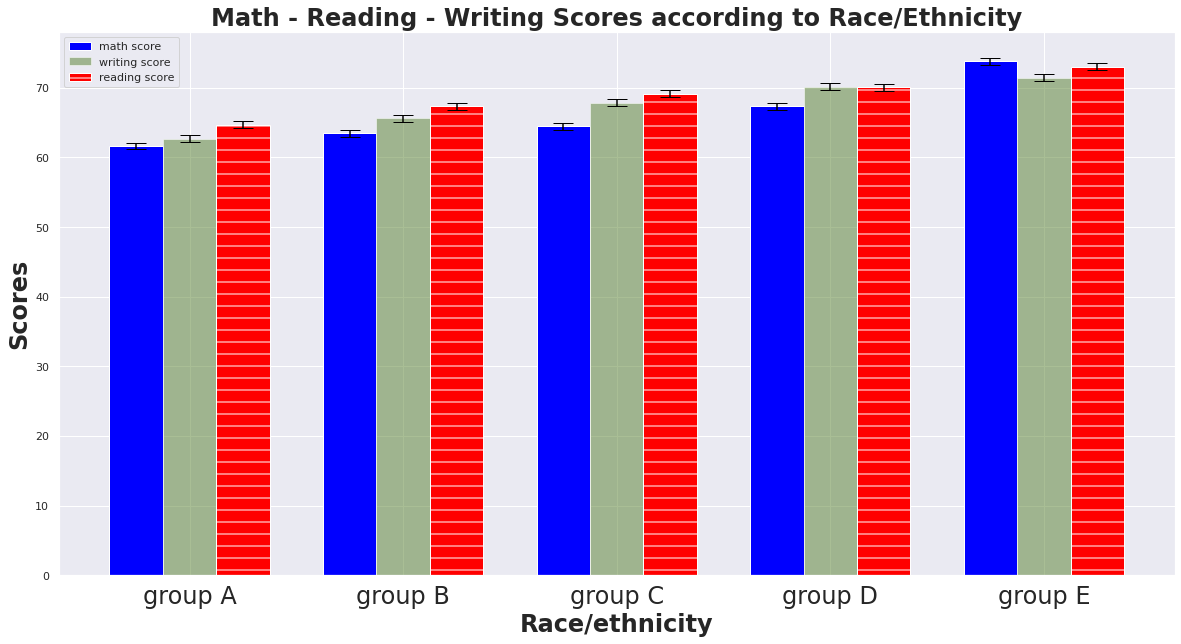

In [ ]:
race_math = dataset[["race/ethnicity","math score"]].groupby(["race/ethnicity"], as_index = False).mean()
race_writing = dataset[["race/ethnicity","writing score"]].groupby(["race/ethnicity"], as_index = False).mean()
race_reading = dataset[["race/ethnicity","reading score"]].groupby(["race/ethnicity"], as_index = False).mean()

plt.figure(figsize=(20,10))
sns.set_theme(style="darkgrid")
plt.title('Math - Reading - Writing Scores according to Race/Ethnicity', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = race_math['math score']
bars2 = race_writing['writing score']
bars3 = race_reading['reading score']
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='math score', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='writing score', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='reading score', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = race_math['race/ethnicity']
    
plt.xlabel('Race/ethnicity', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 0, size = 24)
 
plt.legend()
plt.show()

### Outline:

race/ethnicity:

group C    319

group D    262

group B    190

group E    140

group A     89

**!!! When the scores are evaluated by race, the rankings do not change. 'group E' has the highest scores while 'group A' has the lowest scores. However, the number of samples should also be considered here. 'group A' has the least samples. 'group E' has the least sample after A. !!!**

<a id = "9"></a><br>
## parental level of education

In [ ]:
dataset[["parental level of education","math score"]].groupby(["parental level of education"], as_index = False).mean().sort_values(by="math score",ascending = False)

,parental level of education,math score
3,master's degree,69.745763
1,bachelor's degree,69.389831
0,associate's degree,67.882883
4,some college,67.128319
5,some high school,63.497207
2,high school,62.137755


In [ ]:
dataset[["parental level of education","reading score"]].groupby(["parental level of education"], as_index = False).mean().sort_values(by="reading score",ascending = False)

,parental level of education,reading score
3,master's degree,75.372881
1,bachelor's degree,73.000000
0,associate's degree,70.927928
4,some college,69.460177
5,some high school,66.938547
2,high school,64.704082


In [ ]:
dataset[["parental level of education","writing score"]].groupby(["parental level of education"], as_index = False).mean().sort_values(by="writing score",ascending = False)

,parental level of education,writing score
3,master's degree,75.677966
1,bachelor's degree,73.381356
0,associate's degree,69.896396
4,some college,68.840708
5,some high school,64.888268
2,high school,62.448980


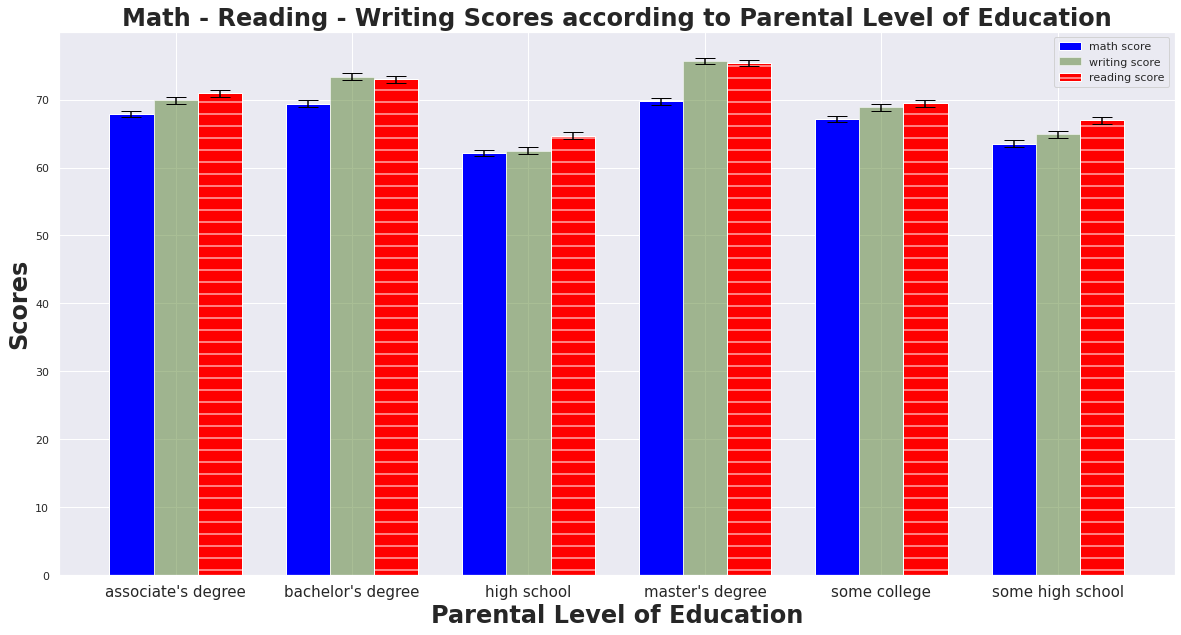

In [ ]:
race_math = dataset[["parental level of education","math score"]].groupby(["parental level of education"], as_index = False).mean()
race_writing = dataset[["parental level of education","writing score"]].groupby(["parental level of education"], as_index = False).mean()
race_reading = dataset[["parental level of education","reading score"]].groupby(["parental level of education"], as_index = False).mean()

plt.figure(figsize=(20,10))
plt.title('Math - Reading - Writing Scores according to Parental Level of Education', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = race_math['math score']
bars2 = race_writing['writing score']
bars3 = race_reading['reading score']
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='math score', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='writing score', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='reading score', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = race_math['parental level of education']
    
plt.xlabel('Parental Level of Education', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 0, size = 15)
 
plt.legend()
plt.show()

### Outline:

parental level of education:

some college          226

associate's degree    222

high school           196

some high school      179

bachelor's degree     118

master's degree        59

**!!! When parental education levels are evaluated; It is seen that the average of students whose parents have completed a Master is the highest in all tests. The lowest averages are those whose parents have High school degree. However, here, too, it is necessary to consider the size of the sample set. While there are 59 samples in Master's Degree, there are 196 samples in the 'High School' set. !!!**

<a id = "10"></a><br>
## lunch

In [ ]:
dataset[["lunch","math score"]].groupby(["lunch"], as_index = False).mean().sort_values(by="math score",ascending = False)

,lunch,math score
1,standard,70.034109
0,free/reduced,58.921127


In [ ]:
dataset[["lunch","reading score"]].groupby(["lunch"], as_index = False).mean().sort_values(by="reading score",ascending = False)

,lunch,reading score
1,standard,71.654264
0,free/reduced,64.653521


In [ ]:
dataset[["lunch","writing score"]].groupby(["lunch"], as_index = False).mean().sort_values(by="writing score",ascending = False)

,lunch,writing score
1,standard,70.823256
0,free/reduced,63.022535


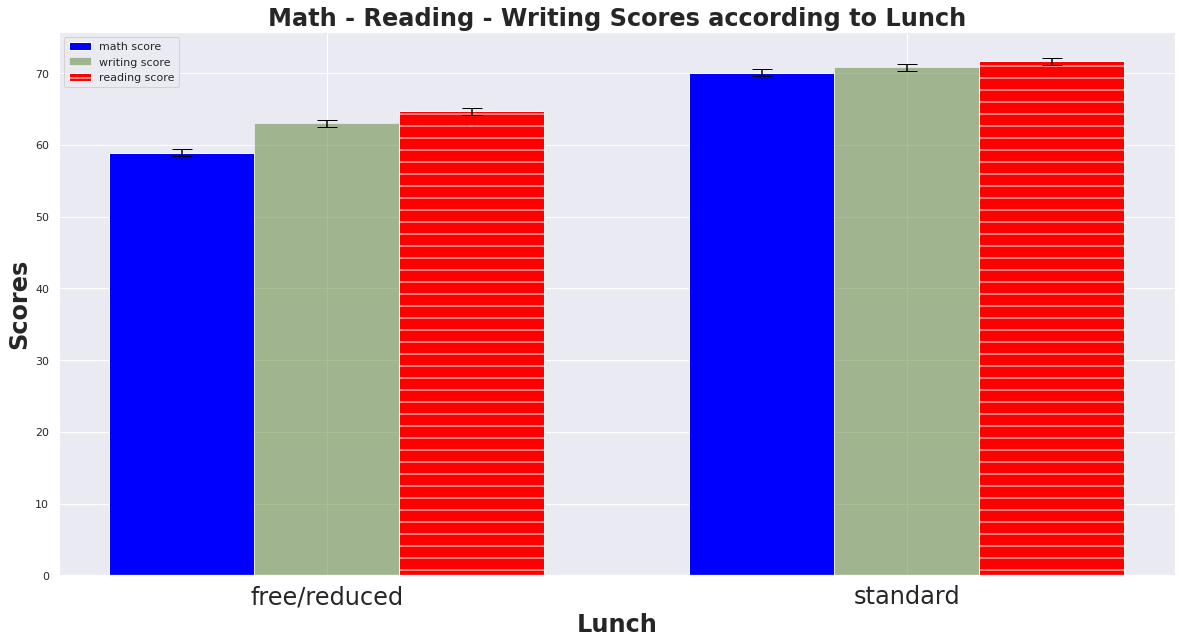

In [ ]:
race_math = dataset[["lunch","math score"]].groupby(["lunch"], as_index = False).mean()
race_writing = dataset[["lunch","writing score"]].groupby(["lunch"], as_index = False).mean()
race_reading = dataset[["lunch","reading score"]].groupby(["lunch"], as_index = False).mean()

plt.figure(figsize=(20,10))
plt.title('Math - Reading - Writing Scores according to Lunch', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = race_math['math score']
bars2 = race_writing['writing score']
bars3 = race_reading['reading score']
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='math score', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='writing score', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='reading score', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = race_math['lunch']
    
plt.xlabel('Lunch', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 0, size = 24)
 
plt.legend()
plt.show()

### Outline:

lunch:

standard        645

free/reduced    355

**!!! The 'standard' ones in the 'lunch' feature appear to be more successful than the 'free/reduced' ones. It seems that the biggest difference is in the 'math score'. !!!**

<a id = "11"></a><br>
## test preparation course

In [ ]:
dataset[["test preparation course","math score"]].groupby(["test preparation course"], as_index = False).mean().sort_values(by="math score",ascending = False)

,test preparation course,math score
0,completed,69.695531
1,none,64.077882


In [ ]:
dataset[["test preparation course","reading score"]].groupby(["test preparation course"], as_index = False).mean().sort_values(by="reading score",ascending = False)

,test preparation course,reading score
0,completed,73.893855
1,none,66.534268


In [ ]:
dataset[["test preparation course","writing score"]].groupby(["test preparation course"], as_index = False).mean().sort_values(by="writing score",ascending = False)

,test preparation course,writing score
0,completed,74.418994
1,none,64.504673


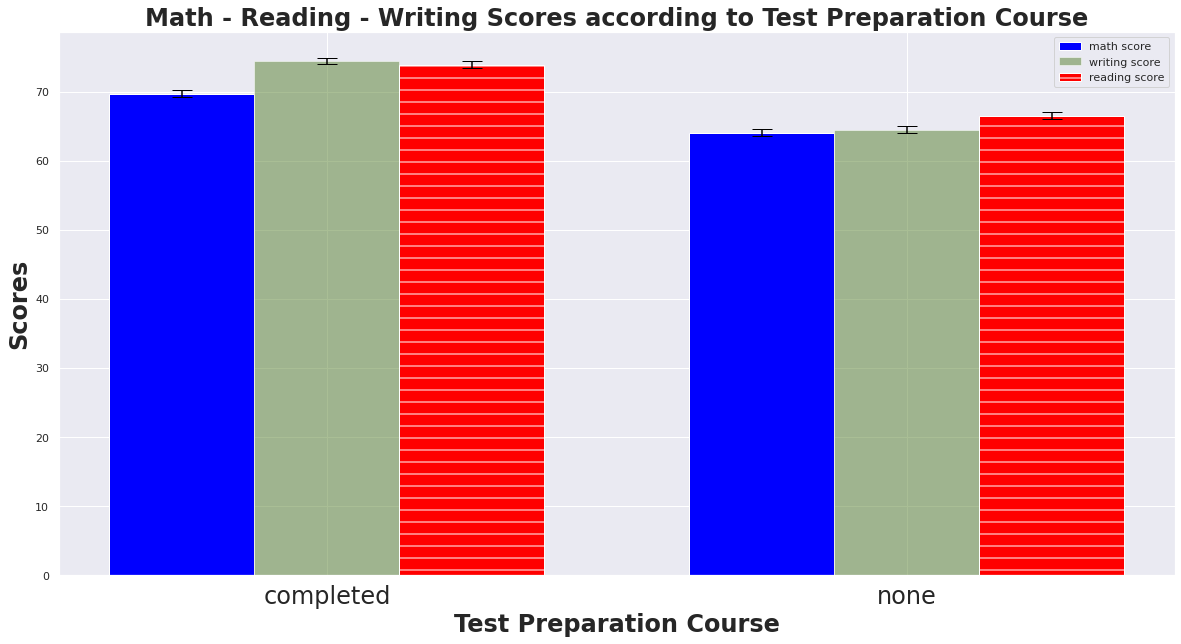

In [ ]:
race_math = dataset[["test preparation course","math score"]].groupby(["test preparation course"], as_index = False).mean()
race_writing = dataset[["test preparation course","writing score"]].groupby(["test preparation course"], as_index = False).mean()
race_reading = dataset[["test preparation course","reading score"]].groupby(["test preparation course"], as_index = False).mean()

plt.figure(figsize=(20,10))
plt.title('Math - Reading - Writing Scores according to Test Preparation Course', fontweight='bold', size = 24)

barWidth = 0.25
 
bars1 = race_math['math score']
bars2 = race_writing['writing score']
bars3 = race_reading['reading score']
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
plt.bar(r1, bars1, color='blue', width=barWidth, edgecolor='white', label='math score', yerr=0.5,ecolor="black",capsize=10)
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='writing score', yerr=0.5,ecolor="black",capsize=10, alpha = .50)
plt.bar(r3, bars3, color='red', width=barWidth, edgecolor='white', label='reading score', yerr=0.5,ecolor="black",capsize=10, hatch = '-')
 
modelNames = race_math['test preparation course']
    
plt.xlabel('Test Preparation Course', fontweight='bold', size = 24)
plt.ylabel('Scores', fontweight='bold', size = 24)
plt.xticks([r + barWidth for r in range(len(bars1))], modelNames, rotation = 0, size = 24)
 
plt.legend()
plt.show()

### Outline:

test preparation course:

none         642

completed    358

**!!! It seems that those who complete the test preparation course are more successful than those who do not. !!!**

<a id = "12"></a><br>
# Anomaly Detection

Anomaly is one that differs / deviates significantly from other observations in the same sample. An anomaly detection pattern produces two different results. The first is a categorical tag for whether the observation is abnormal or not; the second is a score or trust value. Score carries more information than the label. Because it also tells us how abnormal the observation is. The tag just tells you if it's abnormal. While labeling is more common in supervised methods, the score is more common in unsupervised and semisupervised methods.

In [ ]:
#This code is retrieved from here: https://www.kaggle.com/kanncaa1/dataiteam-titanic-eda#Introduction

def detect_outliers(df,features):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * 1.5
        # detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # store indeces
        outlier_indices.extend(outlier_list_col)
    
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(i for i, v in outlier_indices.items() if v > 2)
    
    return multiple_outliers

In [ ]:
dataset.loc[detect_outliers(dataset,['math score', 'reading score', 'writing score'])]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
59,female,group C,some high school,free/reduced,none,0,17,10
980,female,group B,high school,free/reduced,none,8,24,23


In [ ]:
# drop outliers
#train_df = train_df.drop(detect_outliers(train_df,["Age","SibSp","Parch","Fare"]),axis = 0).reset_index(drop = True)

If we were to work on a Machine Learning model, we would have to drop outliers. However, this notebook was written for visualization and EDA. Therefore, I will continue with outliers.

<a id = "13"></a><br>
# Visualization

<a id = "14"></a><br>
## Pie Plot

Pie Charts help show proportions and percentages across categories by dividing a circle into proportional parts. Each arc length represents a proportion of each category, while the full circle represents the sum of all data equal to 100%. Pie charts are ideal for giving the reader a quick idea of the proportional distribution of the data.

Text(0.5, 1.0, 'Distribution of Students by Races')

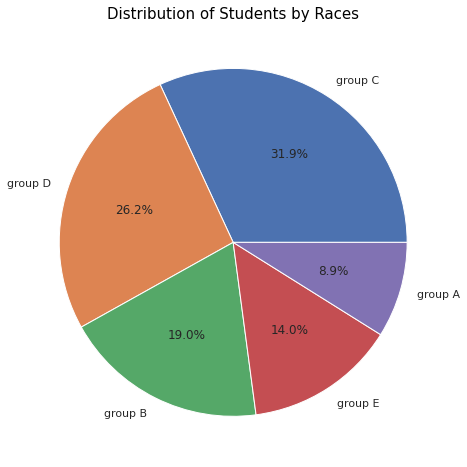

In [ ]:
labels = dataset['race/ethnicity'].value_counts().index
sizes = dataset['race/ethnicity'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Students by Races',color = 'black',fontsize = 15)

This graphic shows the distribution of samples according to their race/ethnicity.

Text(0.5, 1.0, 'Distribution of Students by Genders')

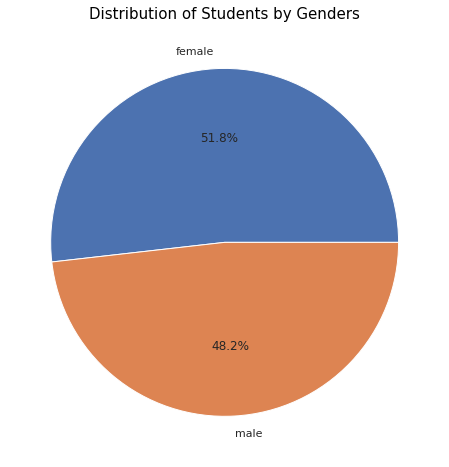

In [ ]:
labels = dataset['gender'].value_counts().index
sizes = dataset['gender'].value_counts().values

plt.figure(figsize = (8,8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%')
plt.title('Distribution of Students by Genders',color = 'black',fontsize = 15)


This graphic shows the distribution of samples according to their gender.

<a id = "15"></a><br>
## Violin Plot

A Violin Plot is used to visualize the distribution and probability density of the data. The thick black bar in the middle represents the interquartile range; The vertically extended thin black line represents 95% confidence intervals and the white point is the media.

<AxesSubplot:xlabel='gender', ylabel='writing score'>

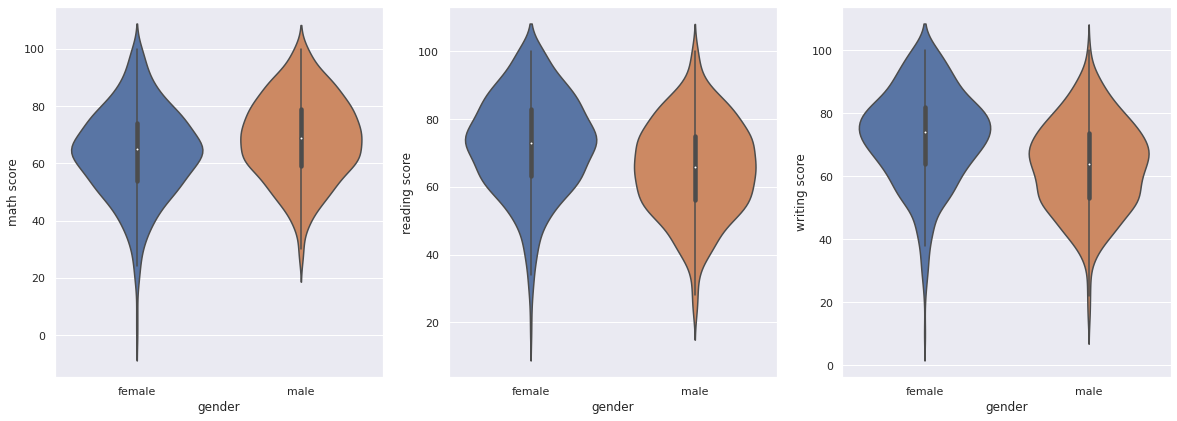

In [ ]:
plt.figure(figsize=(20,15))
sns.set_theme(style="darkgrid")
plt.subplot(2,3,1)
sns.violinplot(x = 'gender', y = 'math score', data = dataset)
plt.subplot(2,3,2)
sns.violinplot(x = 'gender', y = 'reading score', data = dataset)
plt.subplot(2,3,3)
sns.violinplot(x = 'gender', y = 'writing score', data = dataset)

With these graphs, we see the distribution of the scores of men and women.

* For the Math Score: Bloating is in almost the same location, but female show a line to under 20. It ends around 20 in male.
* For Reading Score: There is an accumulation of 70-80 in females. In males, the notes are more evenly spread.
* For Writing Score: It can be seen that the average of females is significantly higher than that of males.

<a id = "16"></a><br>
## Boxen Plot

The Boxen plot is very similar to box plot, except for the fact that it plots different quartile values. By plotting different quartile values, we are able to understand the shape of the distribution particularly in the head end and tail end.

Source for this explanation: https://madhuramiah.medium.com/some-interesting-visualizations-with-seaborn-python-ad207f50b844#:~:text=The%20Boxen%20plot%20is%20very,head%20end%20and%20tail%20end.

<AxesSubplot:xlabel='lunch', ylabel='writing score'>

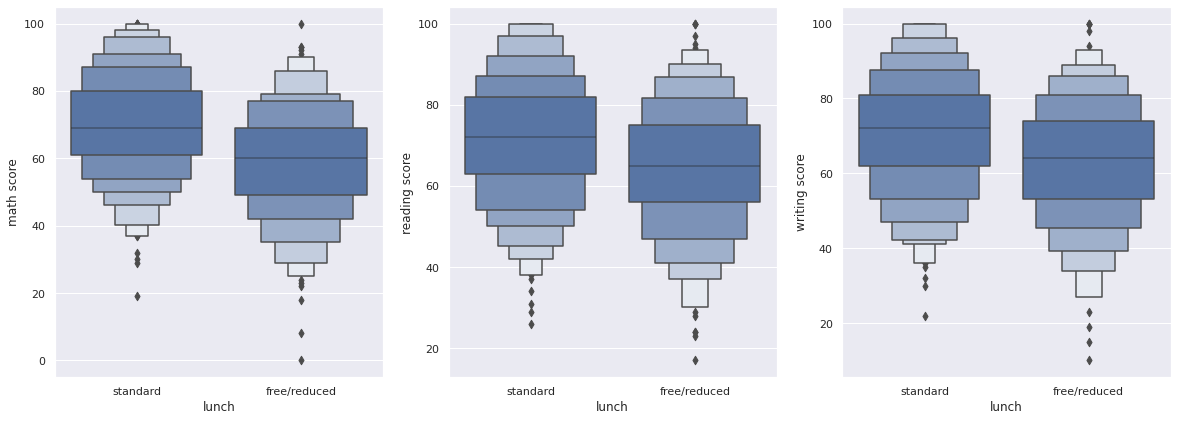

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")


plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.boxenplot(x=dataset['lunch'], y=dataset['math score'],
              color="b", 
              scale="linear", data=dataset)

plt.subplot(2,3,2)
sns.boxenplot(x=dataset['lunch'], y=dataset['reading score'],
              color="b", 
              scale="linear", data=dataset)

plt.subplot(2,3,3)
sns.boxenplot(x=dataset['lunch'], y=dataset['writing score'],
              color="b", 
              scale="linear", data=dataset)




These plots show the change of the Score according to the 'lunch' feature. In general, the 'standard' ones appear to have higher scores.

<a id = "17"></a><br>
## Swarm Plot

Seaborn swarmplot is probably similar to stripplot, only the points are adjusted so it won’t get overlap to each other as it helps to represent the better representation of the distribution of values. A swarm plot can be drawn on its own, but it is also a good complement to a box, preferable because the associated names will be used to annotate the axes. This type of plot sometimes known as “beeswarm”.

Soruce for this text: https://www.geeksforgeeks.org/swarmplot-using-seaborn-in-python/

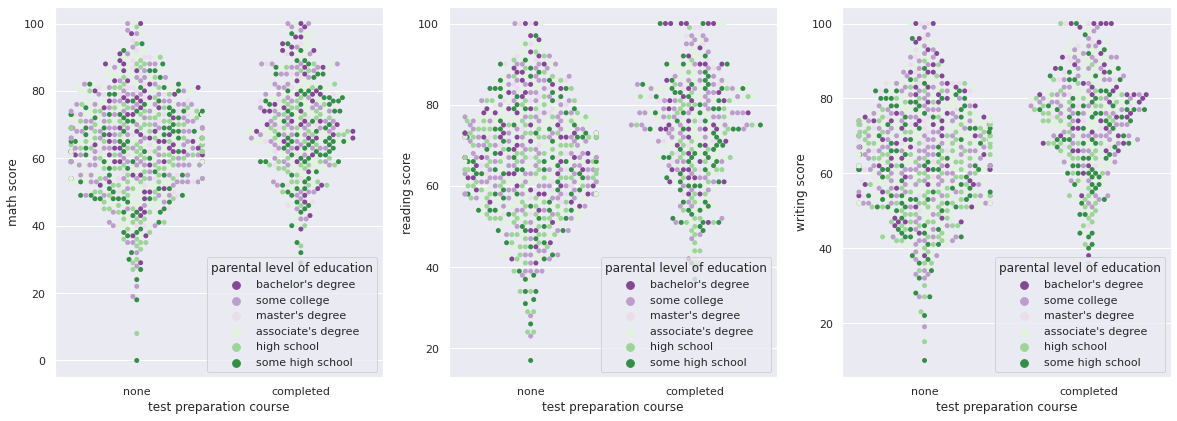

In [ ]:
import seaborn as sns
sns.set_theme(style="darkgrid")

plt.figure(figsize=(20,15))

plt.subplot(2,3,1)
sns.swarmplot(x="test preparation course", y="math score",hue="parental level of education", data=dataset, palette="PRGn")

plt.subplot(2,3,2)
sns.swarmplot(x="test preparation course", y="reading score",hue="parental level of education", data=dataset, palette="PRGn")

plt.subplot(2,3,3)
sns.swarmplot(x="test preparation course", y="writing score",hue="parental level of education", data=dataset, palette="PRGn")

plt.show()

In these graphs, the distribution of Scores according to the 'test preparation course' feature can be seen. At the same time, the education level of the students' families is also seen. We got an image similar to the one we got on Violin Plot. However, with the 'hue' parameter used in swarmplot, we made the plot 3-dimensional.

<a id = "18"></a><br>
## Bar Plot

The Classic Bar Plot is useful for distinguishing between categories and showing numerical comparisons using horizontal or vertical columns. One axis of the chart shows the categories being compared, and the other axis shows a scale of values.

Bar plots differ from Histograms in that they do not show continuous and continuous improvements over a period of time. The discrete data of the Bar Plot are categorical data and therefore "How many?" gives an answer to the question.

Major mistake made in Bar Plot makes definitions problematic as there are too many columns.

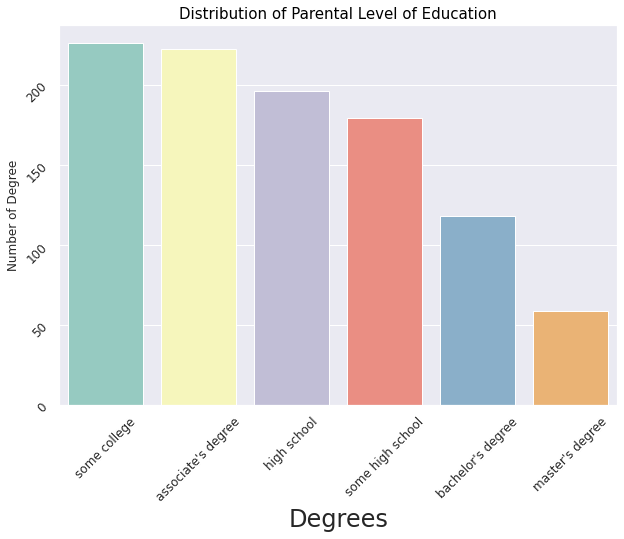

In [ ]:
counts = dataset['parental level of education'].value_counts()

plt.figure(figsize=(10,7))
sns.barplot(x=counts.index, y=counts.values, palette="Set3")

plt.ylabel('Number of Degree')
plt.xlabel('Degrees', style = 'normal', size = 24)

plt.xticks(rotation = 45, size = 12)
plt.yticks(rotation = 45, size = 12)

plt.title('Distribution of Parental Level of Education',color = 'black',fontsize=15)
plt.show()

This chart shows the distribution of the Parental Level of Education.

<a id = "19"></a><br>
## Joint Plot

Draw a plot of two variables with bivariate and univariate graphs.

This function provides a convenient interface to the JointGrid class, with several canned plot kinds. This is intended to be a fairly lightweight wrapper; if you need more flexibility, you should use JointGrid directly.

Source: http://seaborn.pydata.org/generated/seaborn.jointplot.html

In [ ]:
dataset['overall'] = (dataset['math score'] + dataset['reading score'] + dataset['writing score'])/3

**Why did I create an 'overall' column?**

I got the average of reading, writing and math scores to see the students' success in all tests in a single variable. In the following graphs, I will compare 'overall' to other scores.

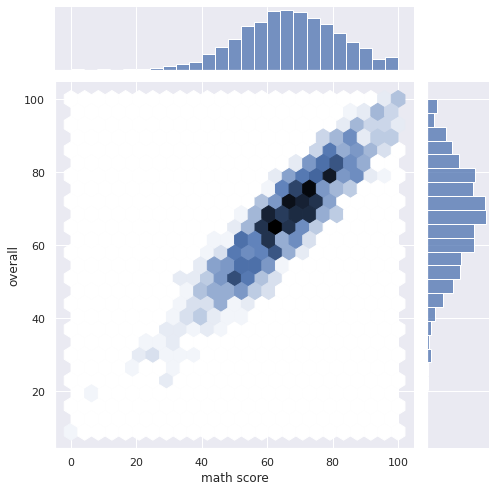

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x = dataset['math score'], y = dataset['overall'], kind = 'hex', size=7)
plt.show()

As expected, there is a linear relationship between the overall - math score. It is observed that the largest concentration is between 60-80.

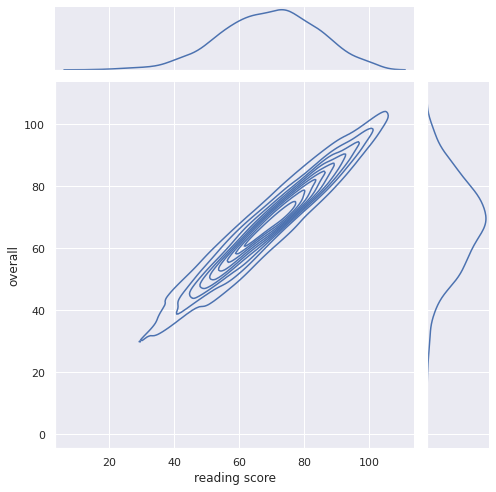

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x = dataset['reading score'], y = dataset['overall'], kind="kde", size=7)
plt.show()

Another kind of Joint Plot. The points where the lines are concentrated show that there are more students in that grade range. Between 60-80.

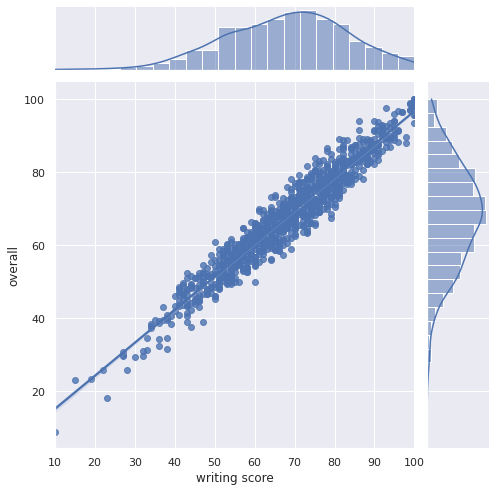

In [ ]:
sns.set_theme(style="darkgrid")
g = sns.jointplot(x = dataset['writing score'], y = dataset['overall'], kind="reg", size=7)
plt.show()

In this graph, as in the others, a linear increase is observed between 'overall' and any Score value. The distribution of students seems balanced between 50-85.

<a id = "20"></a><br>
## Heatmap

Heat maps visualize data with color changes. When applied to the table format, its variables are placed in rows and columns. Coloring the boxes in the table is useful for examining multivariate crosstab data. Heat maps are good for showing more than one variable, revealing any patterns or showing if any variables are alike, and detecting whether there is any correlation between them.

In [ ]:
dataset.corr()

,math score,reading score,writing score,overall
math score,1.000000,0.817580,0.802642,0.918746
reading score,0.817580,1.000000,0.954598,0.970331
writing score,0.802642,0.954598,1.000000,0.965667
overall,0.918746,0.970331,0.965667,1.000000


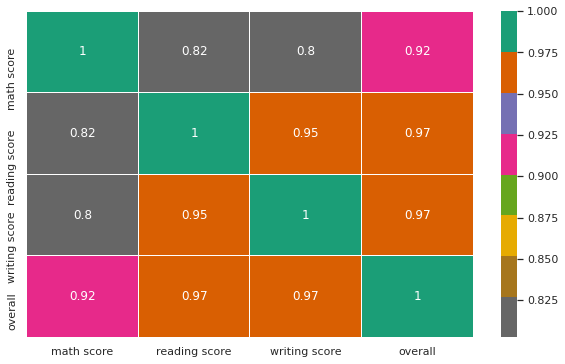

In [ ]:
plt.figure(figsize=(10,6)) 
sns.heatmap(dataset.corr(), annot=True, cmap='Dark2_r', linewidths = .2)
plt.show()

Correlated features are seen in this Heat Map. We have already created the variable 'overall'. Increasing any value will increase 'overall' anyway. It can be deduced from the chart that there is a positive correlation between reading and writing.

<a id = "21"></a><br>
## Pair Plot

Plot pairwise relationships in a dataset.

By default, this function will create a grid of Axes such that each numeric variable in data will by shared across the y-axes across a single row and the x-axes across a single column. The diagonal plots are treated differently: a univariate distribution plot is drawn to show the marginal distribution of the data in each column.

It is also possible to show a subset of variables or plot different variables on the rows and columns.

Source: https://seaborn.pydata.org/generated/seaborn.pairplot.html

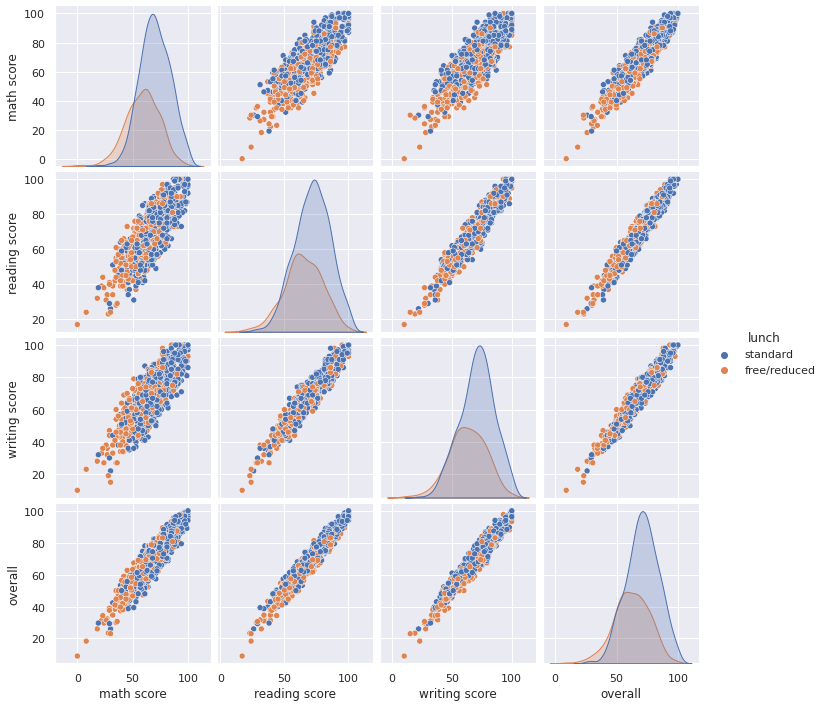

In [ ]:
sns.set_theme(style="darkgrid")
sns.pairplot(dataset, hue="lunch")

***What conclusion can be drawn from this graph?***

As we have reached in previous plots and reviews, students with 'lunch' = 'standard' generally do better than others.

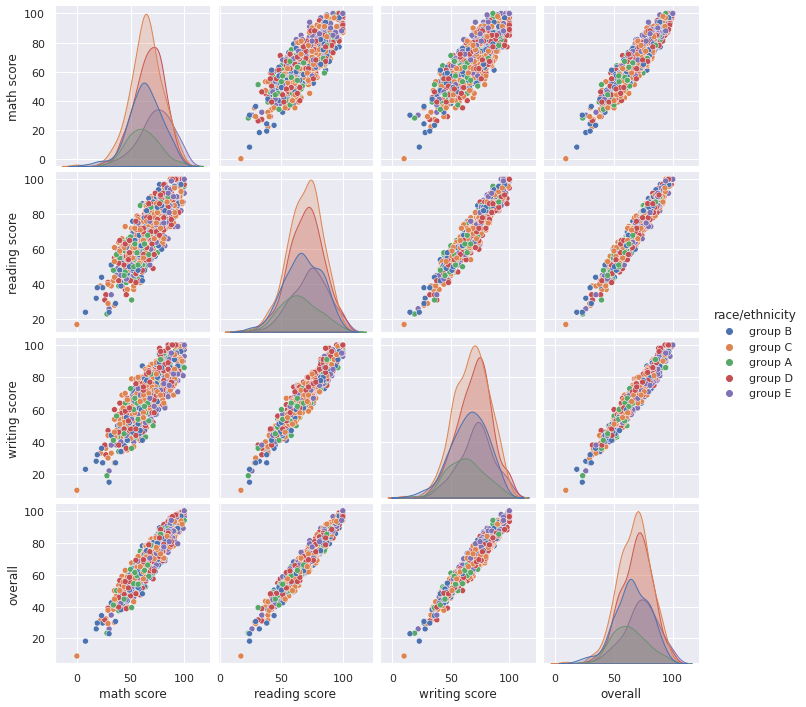

In [ ]:
sns.pairplot(dataset, hue="race/ethnicity")

These graphs are difficult to interpret as there are five options for 'race / ethnicity'. There is no clear distinction between points. I think using two and a maximum of three categories for the Pair Plot will make it easier to interpret.

***How effective is the test preparation course?***

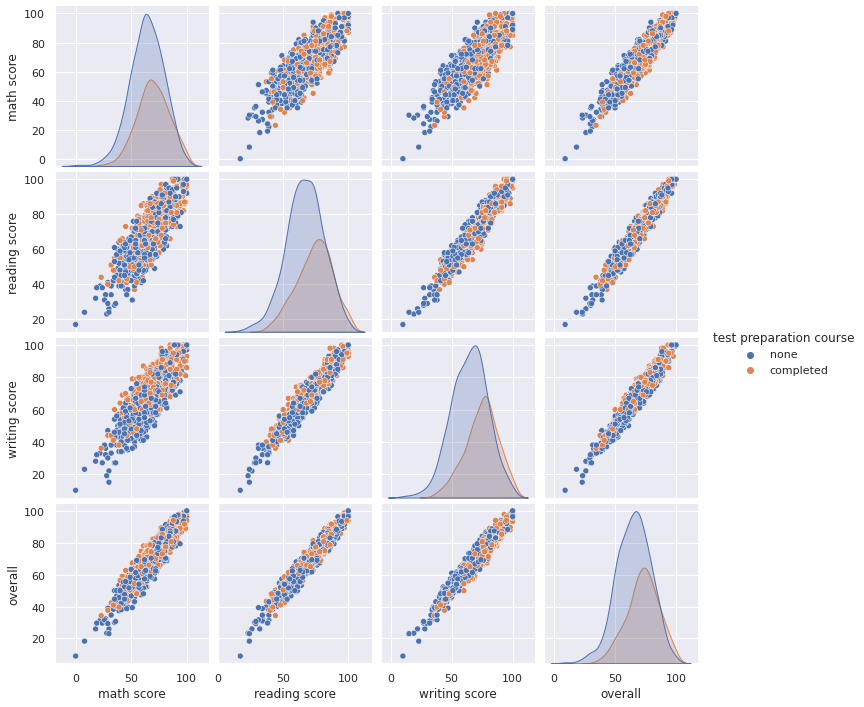

In [ ]:
sns.pairplot(dataset, hue="test preparation course")

**As an answer to the above question;**

We see that the orange dots with 'test preparation course' = 'completed' are higher on the graphs.

<a id = "22"></a><br>
## Box Plot

Box charts are an easy way to visually show the distribution of a quarter of the data.

Lines running parallel to the box are known as "Whiskers" and are used to indicate variation between data above or below a quarter. Extreme values are drawn with individual points in line with the lines sometimes called whiskers. Box-Whisker charts can be drawn horizontally or vertically.

Although box plots look very primitive compared to Histograms and density lines, they have the advantage of taking up less space, which is useful when comparing many group or dataset distributions.

***Which major factors contribute to test outcomes?***

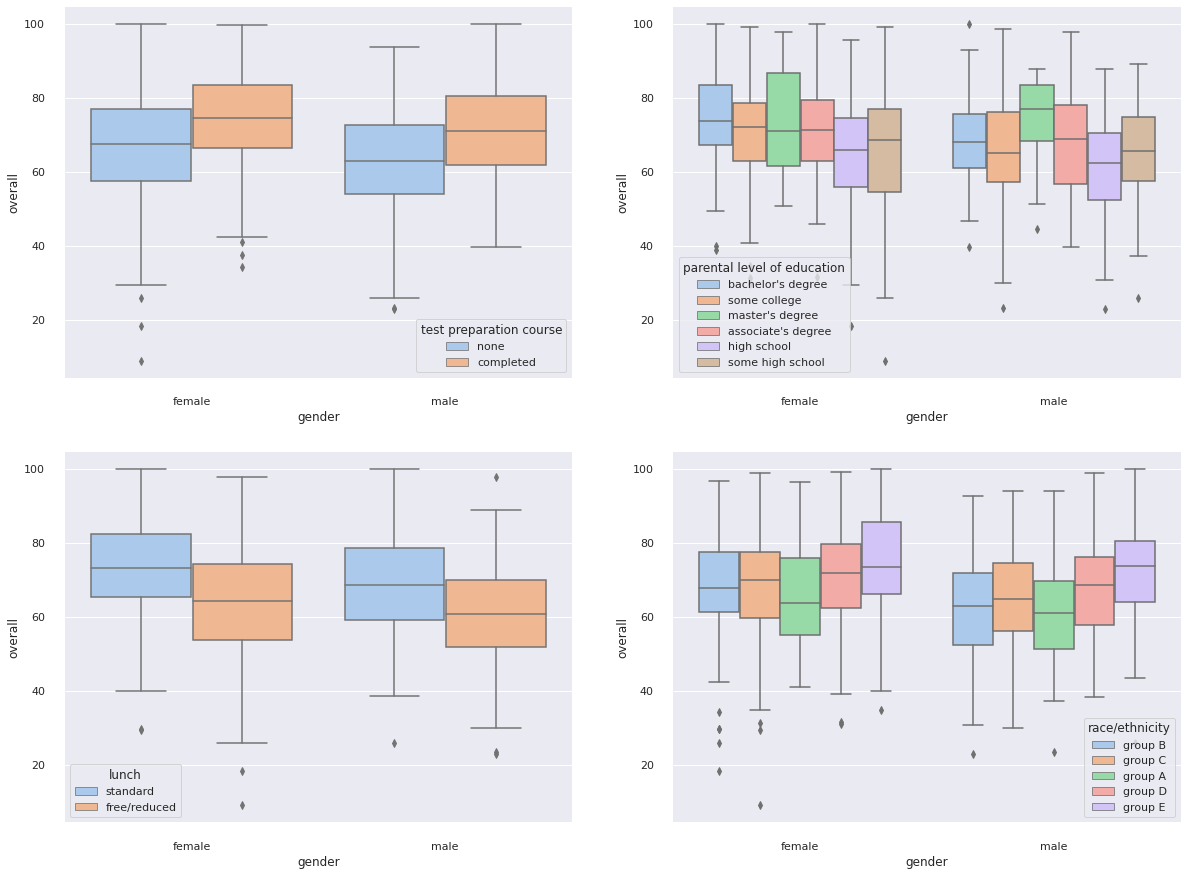

In [ ]:
sns.set_theme(style="darkgrid", palette="pastel")

plt.figure(figsize=(20,15))

plt.subplot(2,2,1)
sns.boxplot(x="gender", y="overall", hue="test preparation course", data=dataset)

plt.subplot(2,2,2)
sns.boxplot(x="gender", y="overall", hue="parental level of education", data=dataset)

plt.subplot(2,2,3)
sns.boxplot(x="gender", y="overall", hue="lunch", data=dataset)

plt.subplot(2,2,4)
sns.boxplot(x="gender", y="overall", hue="race/ethnicity", data=dataset)

sns.despine(offset=10, trim=True)
plt.show()

**As an answer to the above question;**

*** For females:** 'test preparation course' = 'completed' and 'parental level of education' = 'master's degree' and 'lunch' = 'standard' and 'race / ethnicity' = 'group E' values can be shown as factors that increase success.

*** For males:** 'test preparation course' = 'completed' and 'parental level of education' = 'master's degree' and 'lunch' = 'standard' and 'race / ethnicity' = 'group E' values can be shown as factors that increase success.

Since all values are equal for males and females, they can be cited as factors that increase the success of any student.

<a id = "23"></a><br>
## Scatter Plot

The Scatter Chart uses a collection of points placed using Cartesian coordinates to display the values of two variables. By displaying one variable on each axis, it can be determined whether there is a relationship or correlation between two variables.

Various types of correlation can be interpreted through the models displayed on the scatter plot. These can be listed as: positive (values increase together), negative (one value decreases as another increases), null (uncorrelated), linear, exponential, and U. The strength of correlation can be determined by how tight the points fit together on the chart. Points that go beyond the general set of points are called outliers.

<a id = "24"></a><br>
### Scatter Plot with Marginal Ticks

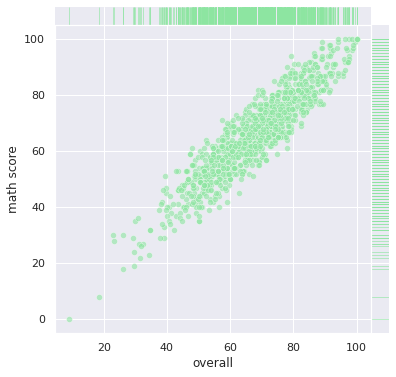

In [ ]:
# Use JointGrid directly to draw a custom plot
g = sns.JointGrid(data=dataset, x="overall", y="math score", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="g", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="g", alpha=.6)

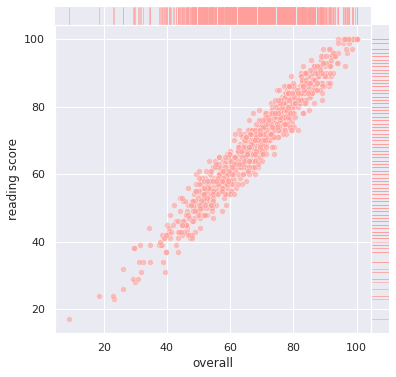

In [ ]:
g = sns.JointGrid(data=dataset, x="overall", y="reading score", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="r", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="r", alpha=.6)

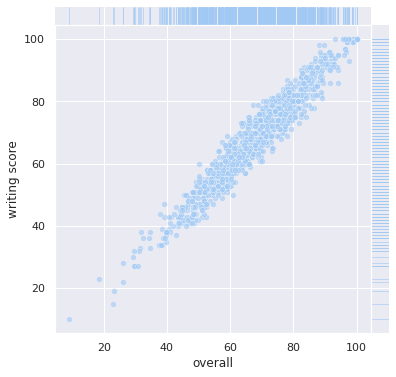

In [ ]:
g = sns.JointGrid(data=dataset, x="overall", y="writing score", space=0, ratio=17)
g.plot_joint(sns.scatterplot, color="b", alpha=.6, legend=False)
g.plot_marginals(sns.rugplot, height=1, color="b", alpha=.6)

In these plots, we got an image similar to Joint Plot. But differently, we can see the density through the lines formed parallel to the x and y axes.

<a id = "25"></a><br>
### Scatter Plot with Multiple Semantics

<AxesSubplot:xlabel='overall', ylabel='math score'>

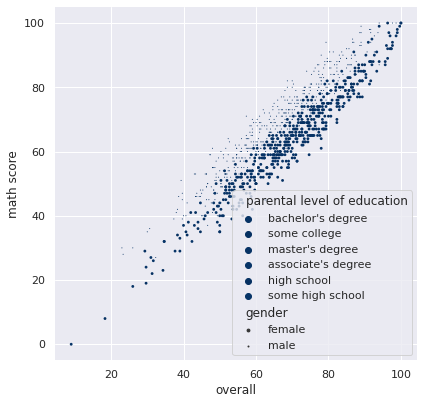

In [ ]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=dataset['overall'], y=dataset['math score'],
                hue=dataset['parental level of education'], 
                size="gender",
                palette="RdBu",
                hue_order=dataset['parental level of education'],
                sizes=(1, 8), 
                linewidth=0,
                data=dataset, ax=ax)

<AxesSubplot:xlabel='overall', ylabel='writing score'>

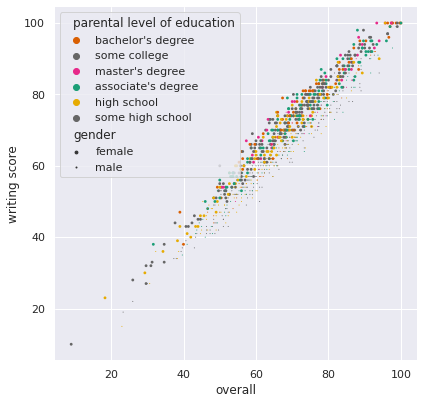

In [ ]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=dataset['overall'], y=dataset['writing score'],
                hue=dataset['parental level of education'], 
                size="gender",
                palette="Dark2",
                hue_order=dataset['parental level of education'],
                sizes=(1, 8), 
                linewidth=0,
                data=dataset, ax=ax)

<AxesSubplot:xlabel='overall', ylabel='reading score'>

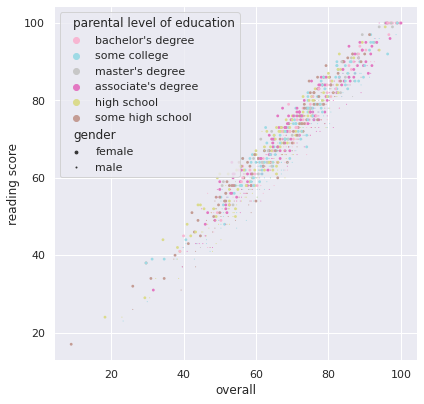

In [ ]:
f, ax = plt.subplots(figsize=(6.5, 6.5))
sns.despine(f, left=True, bottom=True)
sns.set_theme(style="darkgrid")
sns.scatterplot(x=dataset['overall'], y=dataset['reading score'],
                hue=dataset['parental level of education'], 
                size="gender",
                palette="tab20",
                hue_order=dataset['parental level of education'],
                sizes=(1, 8), 
                linewidth=0,
                data=dataset, ax=ax)

***What do these graphs show us?***

First of all, we see a 4-dimensional graph. The color of the dots indicates the 'parental level of education', while their size indicates the gender. When the x and y axes are counted, it becomes a 4 dimensional graph.

<a id = "26"></a><br>
## Stacked Histogram 

A "Histogram" chart is used to show the distribution of data on an ongoing or specific time interval. Each bar / range in the histogram shows the value of the data in the pane. The sum of the values shown by all the bars is equal to the numerical value of the data used in the chart.

Histograms help to predict where values are concentrated, their maximum and minimum points, breaks between data, and whether there are any unusual values. They are also useful in giving a general impression of the "probability" distribution.

<AxesSubplot:xlabel='overall', ylabel='Count'>

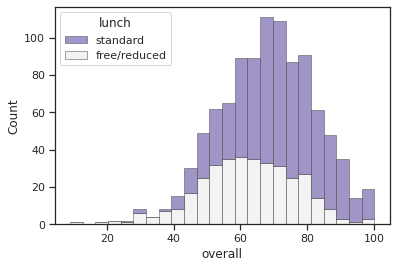

In [ ]:
sns.set_theme(style="ticks")


sns.histplot(
    dataset,
    x="overall", hue="lunch",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    #log_scale=True,
)


<AxesSubplot:xlabel='overall', ylabel='Count'>

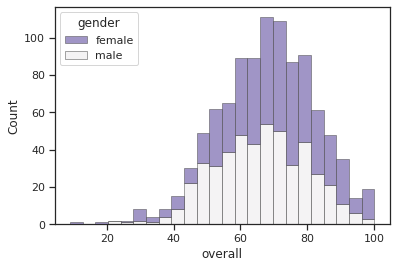

In [ ]:
sns.set_theme(style="ticks")


sns.histplot(
    dataset,
    x="overall", hue="gender",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".3",
    linewidth=.5,
    #log_scale=True,
)


<AxesSubplot:xlabel='overall', ylabel='Count'>

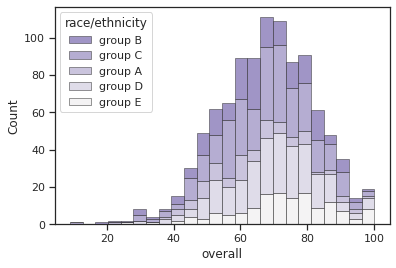

In [ ]:
sns.set_theme(style="ticks")


sns.histplot(
    dataset,
    x="overall", hue="race/ethnicity",
    multiple="stack",
    palette="light:m_r",
    edgecolor=".2",
    linewidth=.5,
    #log_scale=True,
)

These histograms show the distribution of students according to the value specified in the 'hue' parameter. The x-axis shows the overall score.

<a id = "27"></a><br>
## Ridge Plot 

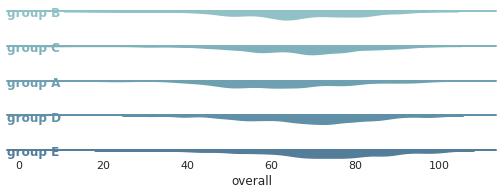

In [ ]:
###
# Source for this code:
# https://seaborn.pydata.org/examples/kde_ridgeplot.html
###

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

# Create the data

x = dataset['overall']
g = dataset['race/ethnicity']
df = dataset

# Initialize the FacetGrid object
pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
g = sns.FacetGrid(dataset, row="race/ethnicity", hue="race/ethnicity", aspect=15, height=.5, palette=pal)

# Draw the densities in a few steps
g.map(sns.kdeplot, 
      'overall',
      bw_adjust=.5, clip_on=False,
      fill=True, alpha=1, 
      linewidth=1.5)

#g.map(sns.kdeplot, "overall", clip_on=False, color="w", lw=2, bw_adjust=.5)
g.map(plt.axhline, y=0, lw=2, clip_on=False)


# Define and use a simple function to label the plot in axes coordinates
def label(x, color, label):
    ax = plt.gca()
    ax.text(0, .22, label, fontweight="bold", color=color,
            ha="left", va="center", transform=ax.transAxes)


g.map(label, 'overall')

# Set the subplots to overlap
g.fig.subplots_adjust(hspace=-5)

# Remove axes details that don't play well with overlap
g.set_titles("")
g.set(yticks=[])
g.despine(bottom=True, left=True)

<a id = "28"></a><br>
# Conclusion

I tried to make an Exploratory Data Analysis on this dataset and explain my inferences. Also, I tried to explain some Seaborn graphics. Examples can be expanded. All quotations are cited.

* If you have questions, please comment them. I will try to explain if you don't understand.
* If you liked this notebook, please UPVOTE.
* If you like my narrative style, you can take a look at the visualization work I made with the Plotly library [here](https://www.kaggle.com/bariscal/visualization-with-plotly-for-beginners). 

Thank you for your time.